In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [68]:
df=pd.read_excel('premiums_rest.xlsx')
df.drop('Unnamed: 0',axis='columns',inplace=True)
df.columns


Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [69]:
df["Genetical_Risk"]=0
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


### Modyfying Column Names

In [70]:
df.columns=df.columns.str.replace(' ',"_").str.lower()

In [71]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


### Handling NA Values

In [72]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [73]:
df.dropna(inplace=True)

In [74]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [75]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [76]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [77]:
df[df.number_of_dependants<0].shape
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3])

In [78]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

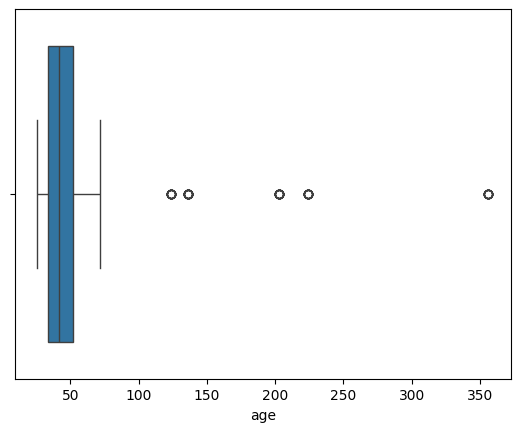

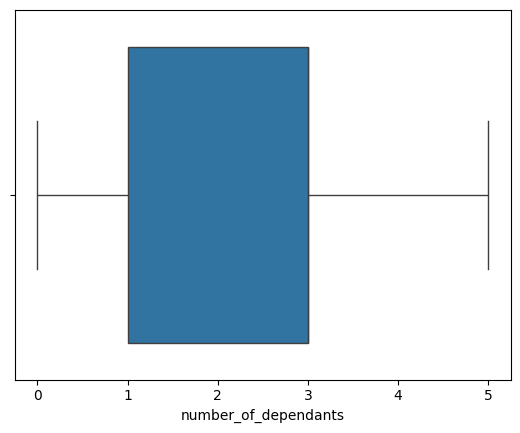

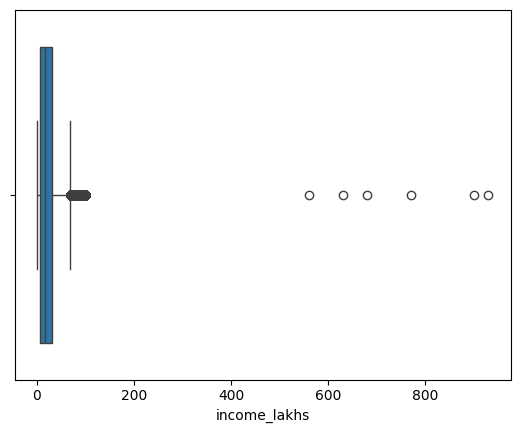

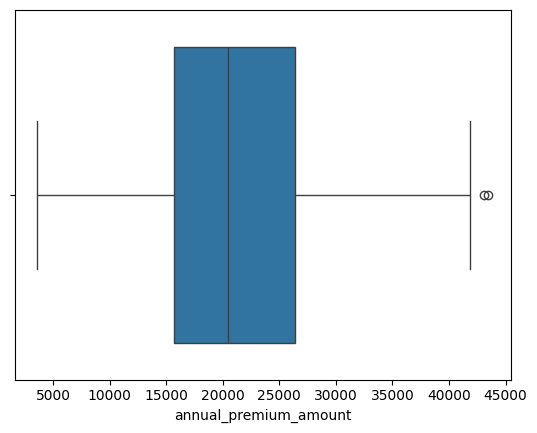

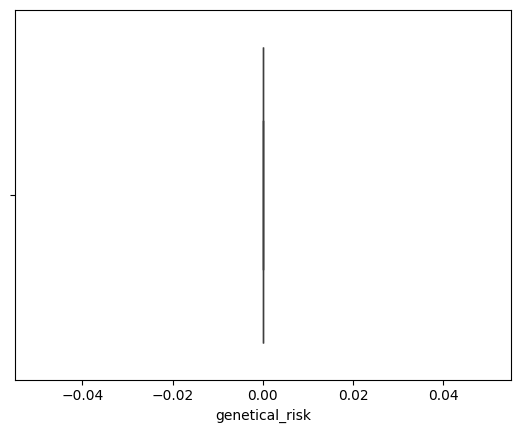

In [79]:
numerix_columns=df.select_dtypes(['float64','int64']).columns
for col in numerix_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [80]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [81]:
df1=df[df.age<100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


<Axes: xlabel='income_lakhs', ylabel='Count'>

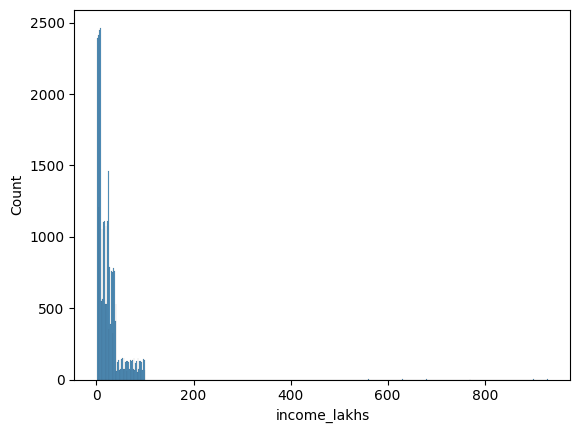

In [82]:
sns.histplot(df1.income_lakhs)

In [83]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

In [84]:
def get_iqr_bounds(col):
    Q1,Q3=df.income_lakhs.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3 + 1.5*IQR
    return lower_bound,upper_bound

In [85]:
quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [86]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


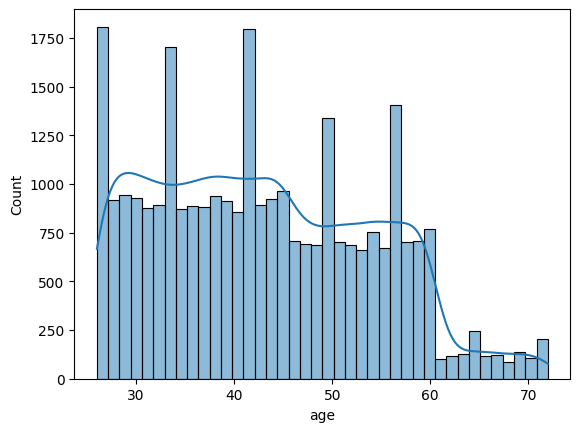

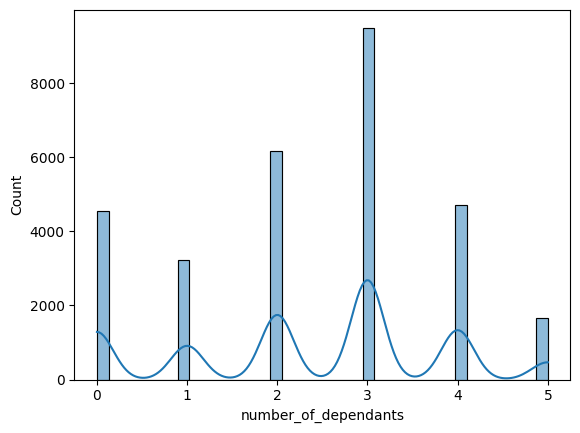

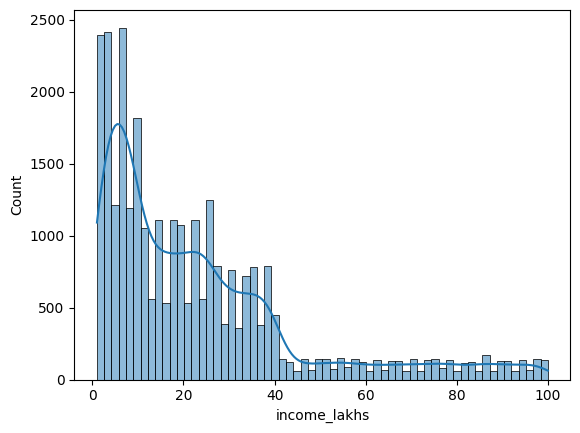

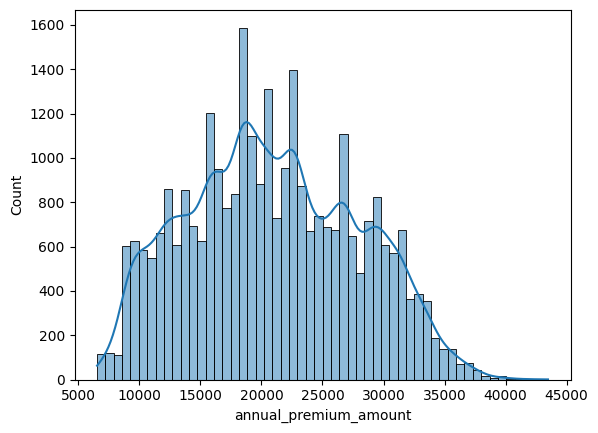

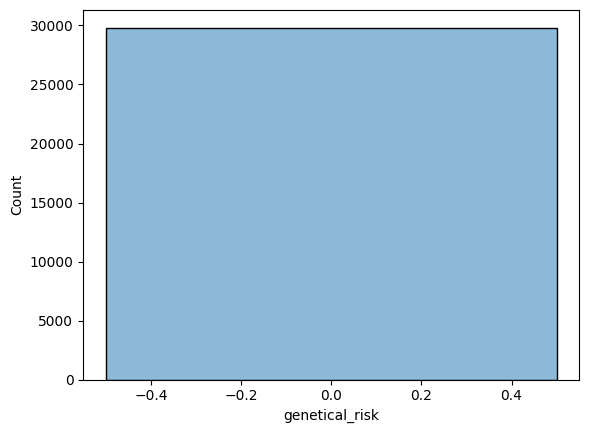

In [87]:
for col in numerix_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

In [88]:
categorical_col=df2.drop(['age','number_of_dependants','income_lakhs','annual_premium_amount'],axis='columns').columns.to_list()


In [89]:
for col in categorical_col:
    print(col,df2[col].unique())

gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']
genetical_risk [0]


In [90]:
df2.replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking',},inplace=True)

In [91]:
a={}
for col in categorical_col:
    a[f'{col}']=col
a

{'gender': 'gender',
 'region': 'region',
 'marital_status': 'marital_status',
 'bmi_category': 'bmi_category',
 'smoking_status': 'smoking_status',
 'employment_status': 'employment_status',
 'income_level': 'income_level',
 'medical_history': 'medical_history',
 'insurance_plan': 'insurance_plan',
 'genetical_risk': 'genetical_risk'}

In [92]:
df2['gender'].value_counts(normalize=True)

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

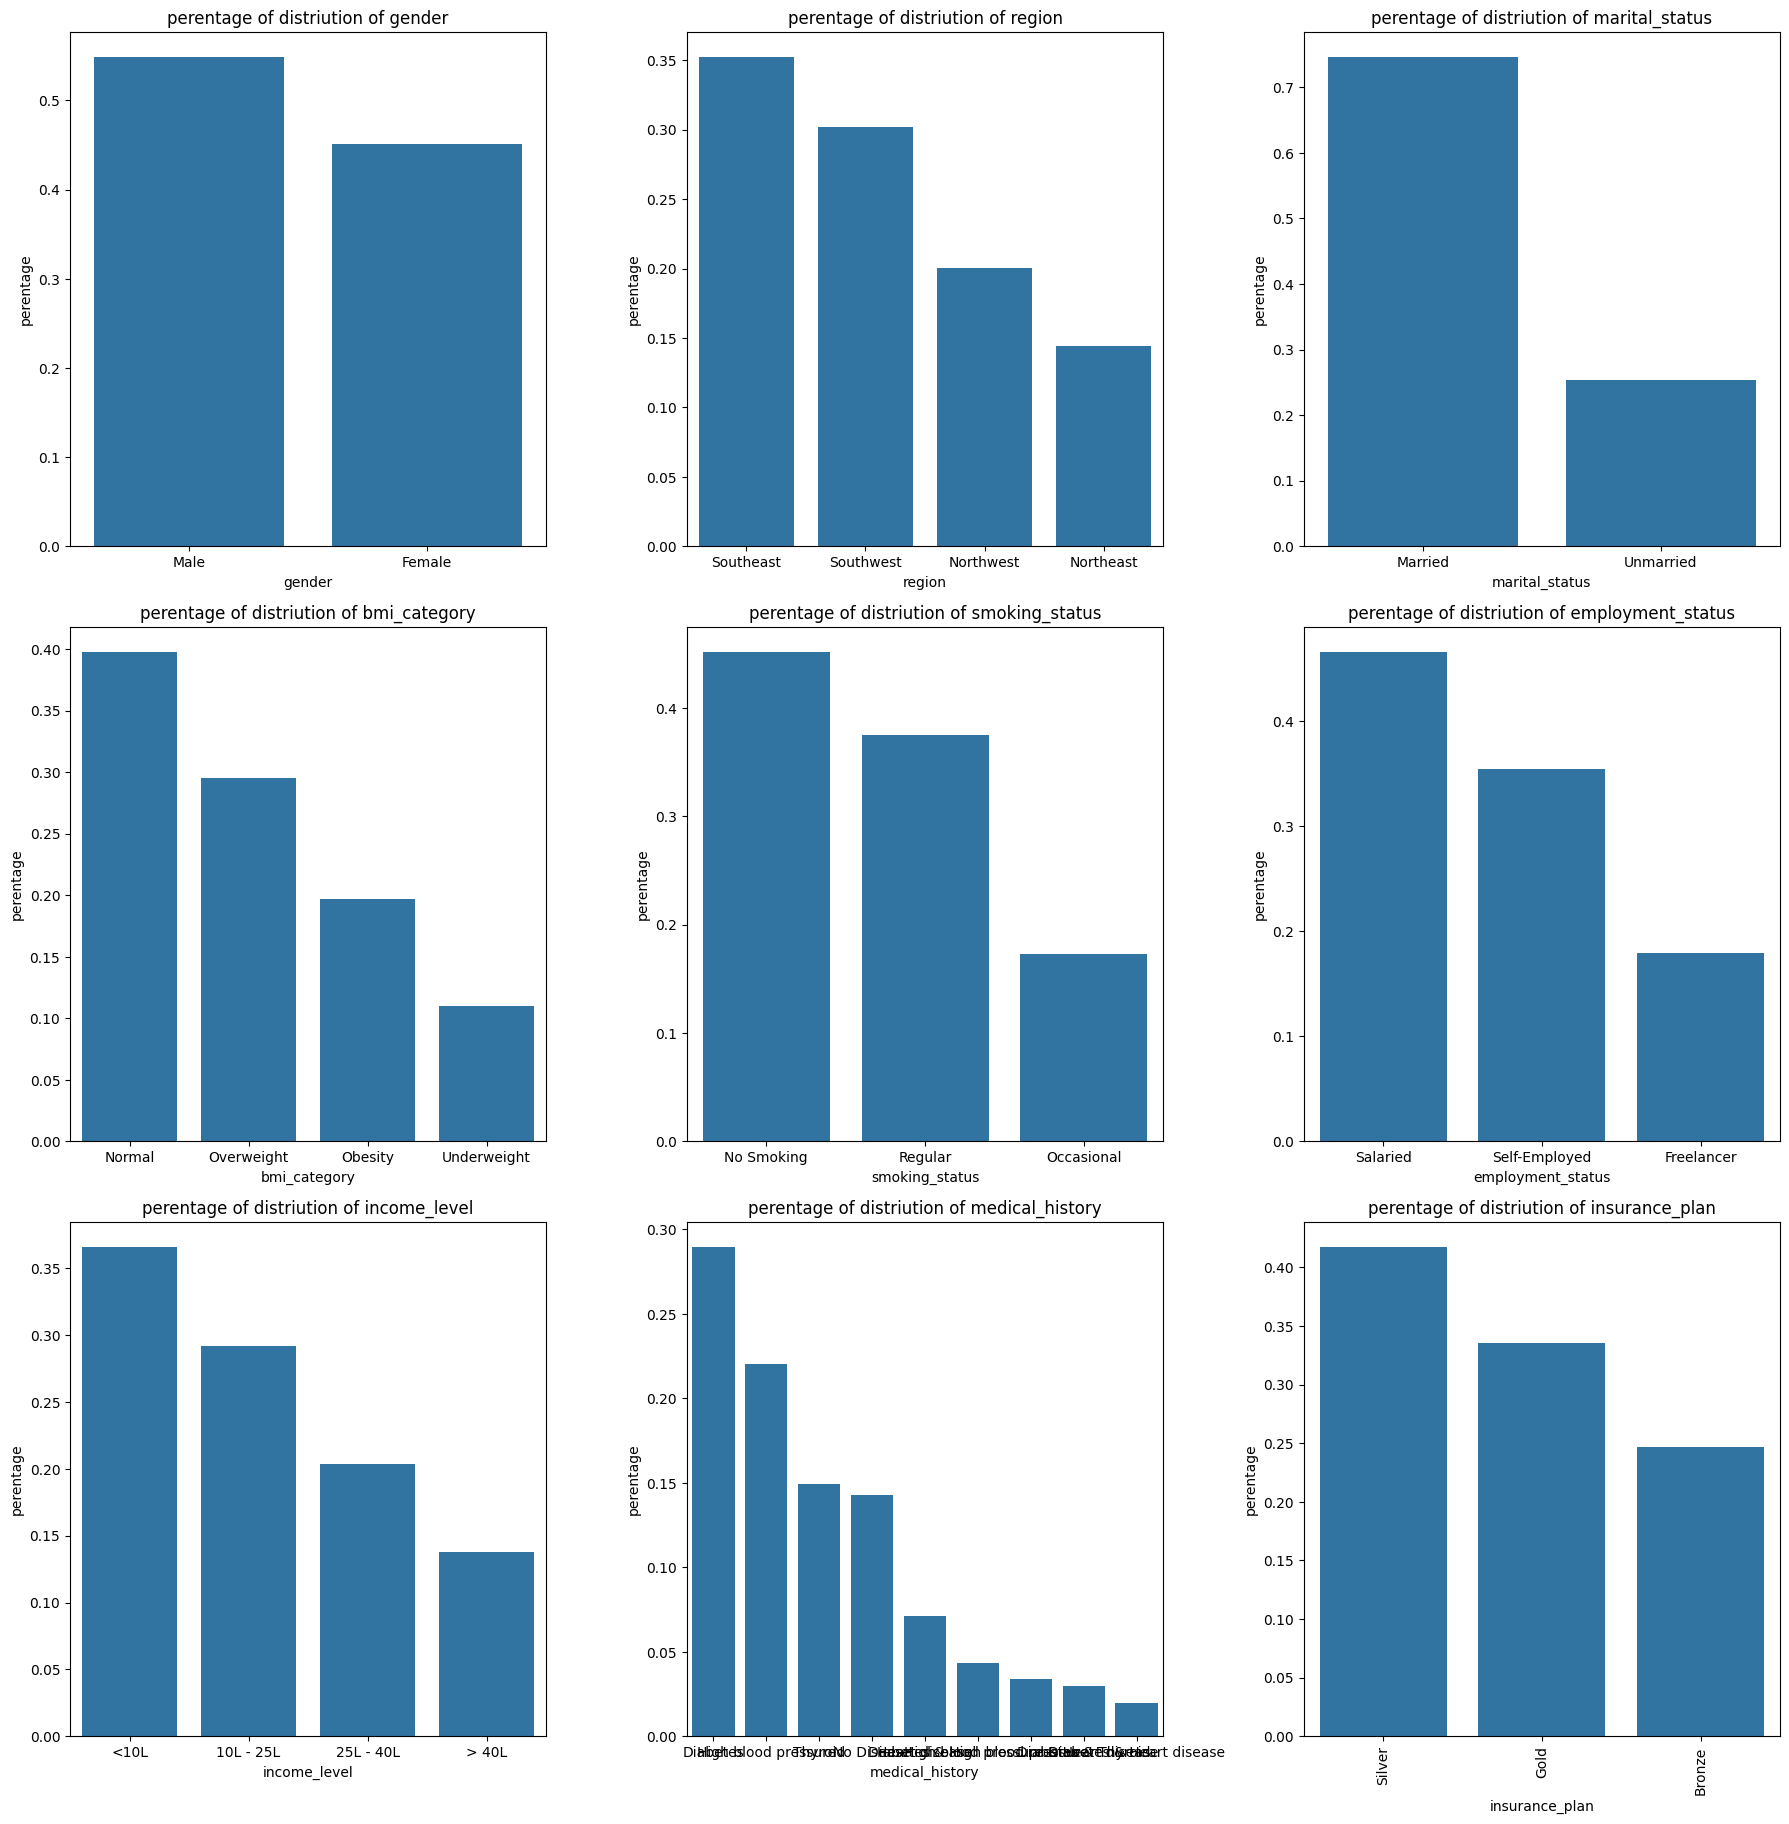

In [93]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
ax=axes.flatten()
for col,ax in zip(categorical_col,ax):
    category_counts=df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'perentage of distriution of {col}')
    
    ax.set_ylabel('perentage')
    ax.set_xlabel(col)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
    

<Axes: xlabel='income_level'>

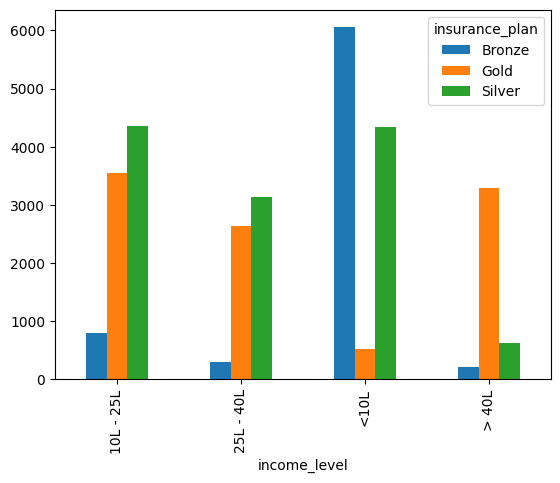

In [94]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab.plot(kind='bar')

In [95]:
df2.medical_history.unique()
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
15750,33,Male,Southeast,Married,2,Normal,Occasional,Freelancer,25L - 40L,25,High blood pressure,Gold,23493,0
21921,28,Male,Southwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,8994,0
8642,48,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,> 40L,62,Diabetes,Silver,18230,0
9920,41,Female,Northeast,Married,3,Overweight,No Smoking,Salaried,> 40L,62,Diabetes,Bronze,11346,0
3276,28,Female,Northwest,Married,3,Normal,Occasional,Freelancer,10L - 25L,15,Thyroid,Silver,16826,0


In [96]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None


In [97]:
df2.fillna({'disease1':'none'},inplace=True)
df2.fillna({'disease2':'none'},inplace=True)
# df2['disease1'].replace('diabetes ','diabetes',inplace=True)
df2['total_risk_score']=0
df2['total_risk_score'] = df2['disease1'].map(risk_scores) + df2['disease2'].map(risk_scores)
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571


In [98]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [99]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3])

In [100]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [101]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [102]:
df2['income_level']=df2['income_level'].map({'<10L':1,'10L - 25L':2,'> 40L':4, '25L - 40L':3})
df2.income_level.unique()

array([1, 2, 4, 3])

In [103]:
nominal_columns=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [104]:
df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


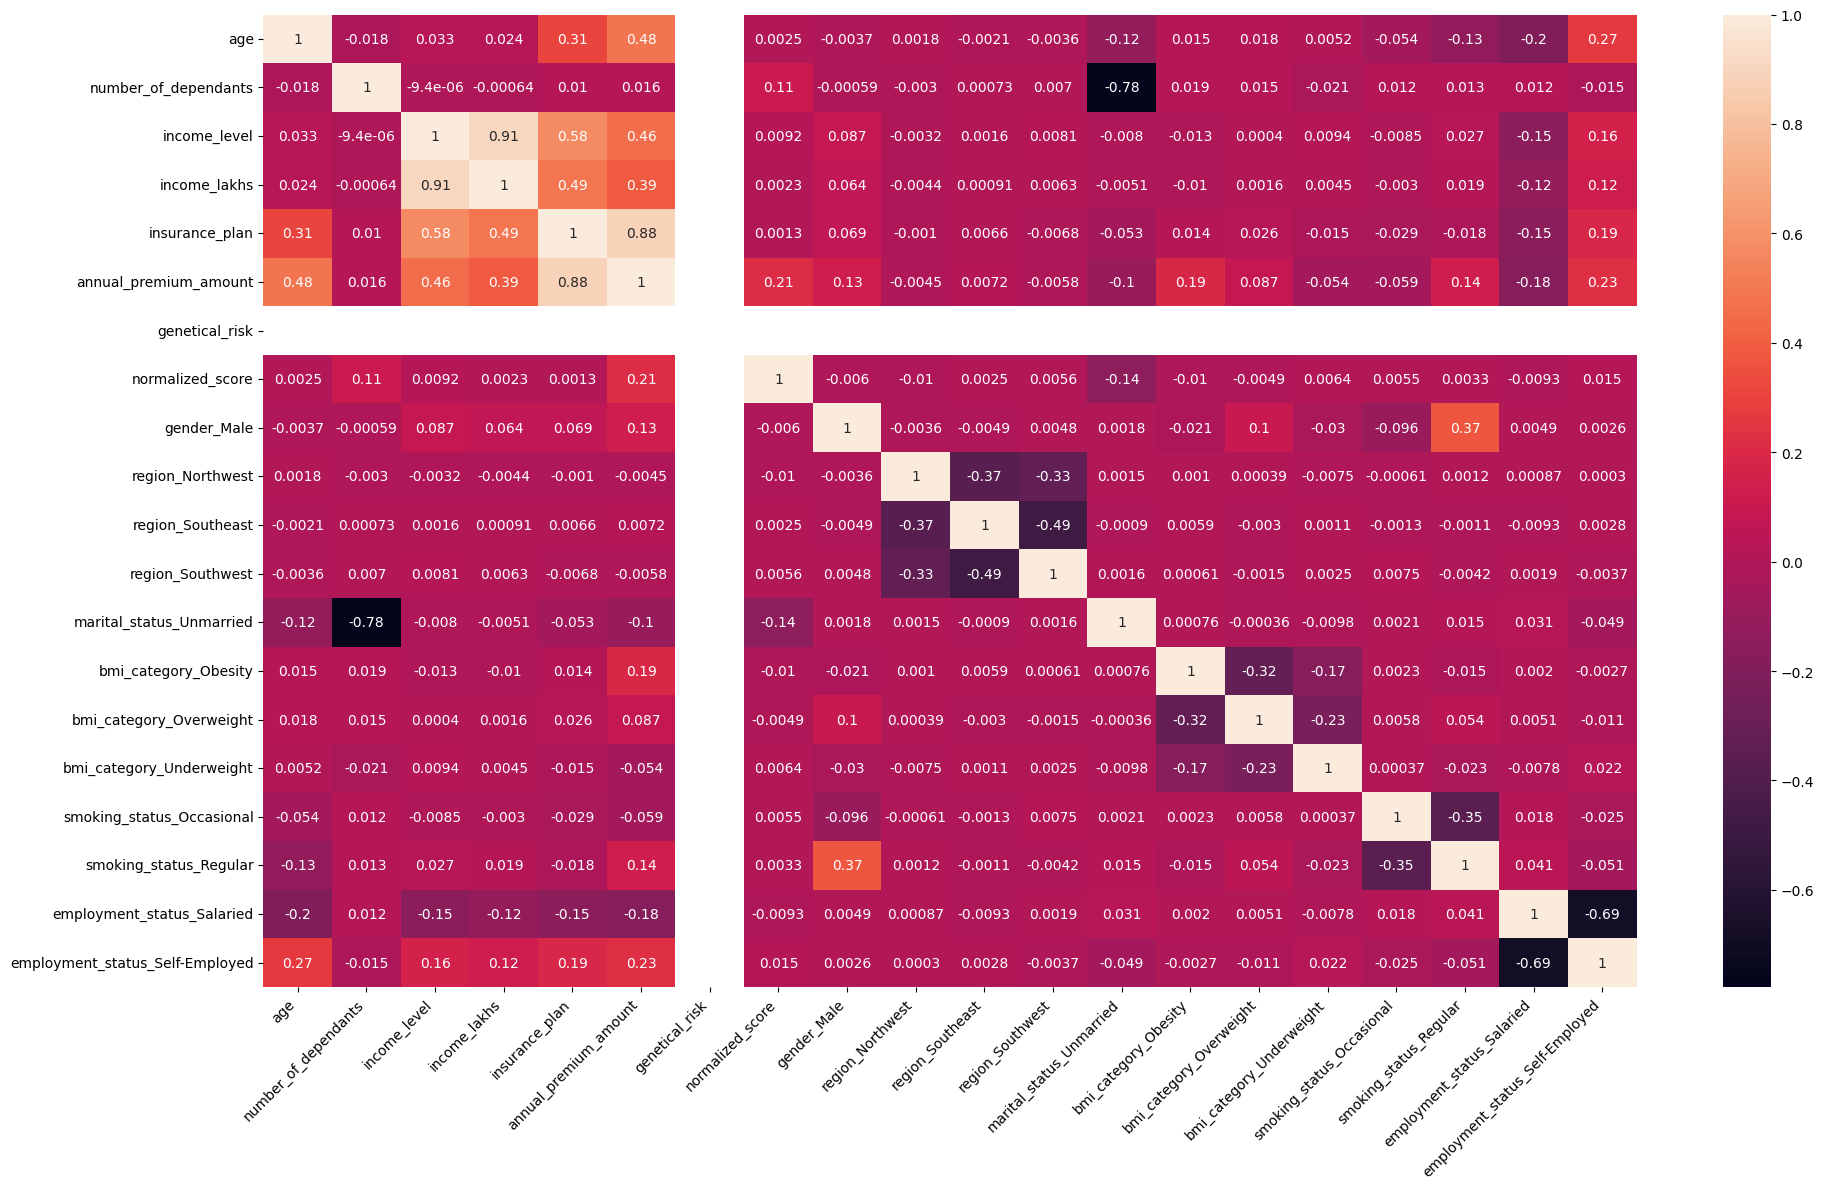

In [105]:
cm=df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [106]:
from sklearn.preprocessing import MinMaxScaler
X=df4.drop('annual_premium_amount',axis="columns")
y=df4['annual_premium_amount']
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

                   
calculate_vif(X)

/home/yashwanth/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [108]:
X_reduecd=X.drop('income_level',axis="columns")
X_reduecd.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


#### MODEL TRAINING

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X_reduecd,y,test_size=0.3,random_state=10)
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score=model_lr.score(X_train,y_train)
train_score,test_score

(0.9534163989489616, 0.9538448451629948)

In [110]:
model_lr.coef_

array([ 7.01623933e+03, -1.31176470e+03, -7.08193369e+02,  1.48359882e+04,
        6.82121026e-13,  6.05362412e+03,  3.75582688e+01, -5.52508721e+01,
       -1.96225429e+01, -2.22896756e+01, -7.00320200e+02,  3.92681271e+03,
        1.97945605e+03,  6.12866236e+02,  8.37395101e+02,  2.80066184e+03,
       -4.54913671e+01,  2.43078421e+02])

In [111]:
list(X_test.columns)

['age',
 'number_of_dependants',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk',
 'normalized_score',
 'gender_Male',
 'region_Northwest',
 'region_Southeast',
 'region_Southwest',
 'marital_status_Unmarried',
 'bmi_category_Obesity',
 'bmi_category_Overweight',
 'bmi_category_Underweight',
 'smoking_status_Occasional',
 'smoking_status_Regular',
 'employment_status_Salaried',
 'employment_status_Self-Employed']

In [112]:
model_lr.intercept_

5935.981289344609

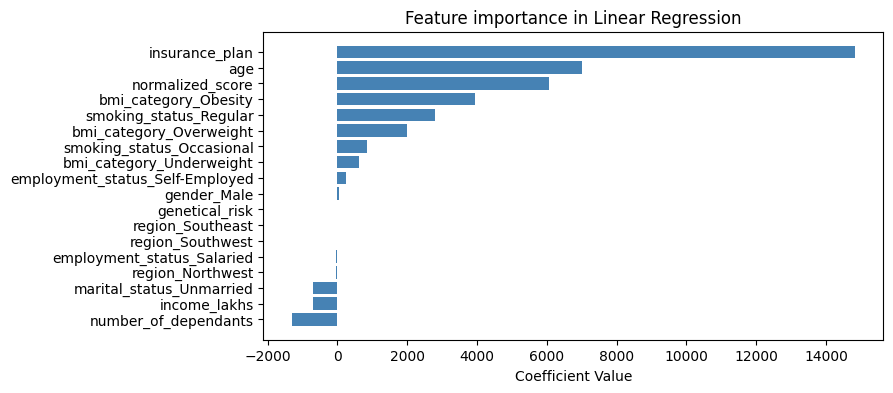

In [113]:
feature_importances=model_lr.coef_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [114]:
model_r=Ridge()
model_r.fit(X_train,y_train)
test_score=model_r.score(X_test,y_test)
train_score=model_r.score(X_train,y_train)
train_score,test_score

(0.9534162332209687, 0.9538456995663842)

In [115]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score=model_xgb.score(X_train,y_train)
train_score,test_score

(0.9986370801925659, 0.9979538321495056)

In [116]:
y_pred=model_xgb.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)
rmse_xgb

311.14982789762087

In [117]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [118]:
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
random_search.fit(X_train,y_train)
random_search.best_score_

0.9980716705322266

In [119]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}

In [120]:
best_model=random_search.best_estimator_

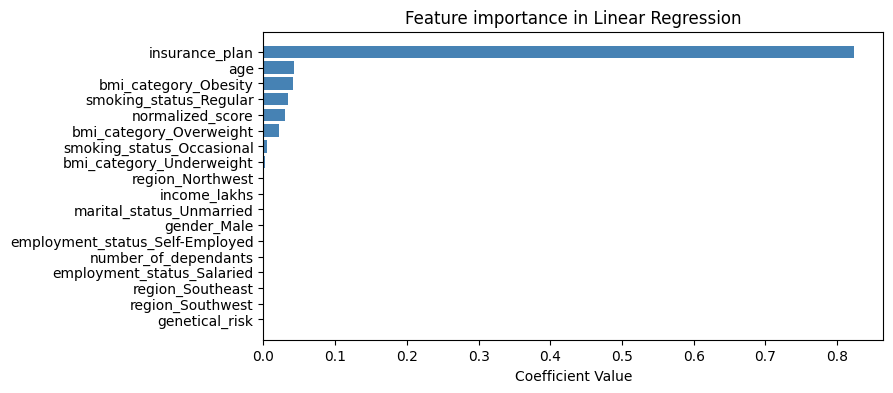

In [121]:
feature_importances=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [122]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
19713,0.652174,0.0,0.262626,1.0,0,0.428571,0,0,0,1,1,0,0,0,0,0,0,1
14750,0.000000,0.8,0.101010,0.5,0,1.000000,0,0,0,1,0,0,0,1,0,1,1,0
19932,0.652174,0.0,0.040404,0.5,0,0.428571,1,0,1,0,1,0,0,0,0,1,1,0
29643,0.000000,0.6,0.020202,0.0,0,0.428571,0,0,0,1,0,0,0,0,0,0,1,0
17076,0.695652,1.0,0.323232,1.0,0,0.357143,0,0,0,1,0,0,0,0,0,0,0,1


In [123]:
from joblib import dump
dump(best_model,'artifacts/model_rest.joblib')
scaler_with_cols={'scaler':scaler,'cols_to_scale':cols_to_scale}
dump(scaler_with_cols,'artifacts/scaler_rest.joblib')

['artifacts/scaler_rest.joblib']

### ERROR ANLYSIS

In [124]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct = residuals*100/y_test
results_df=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':residuals,'diff_pct':residuals_pct})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26553.378906,-341.621094,-1.270203
14750,22734,23020.988281,286.988281,1.262375
19932,21198,21575.480469,377.480469,1.780736
29643,9100,9073.785156,-26.214844,-0.288075
17076,26434,26564.386719,130.386719,0.493254


<Axes: xlabel='diff_pct', ylabel='Count'>

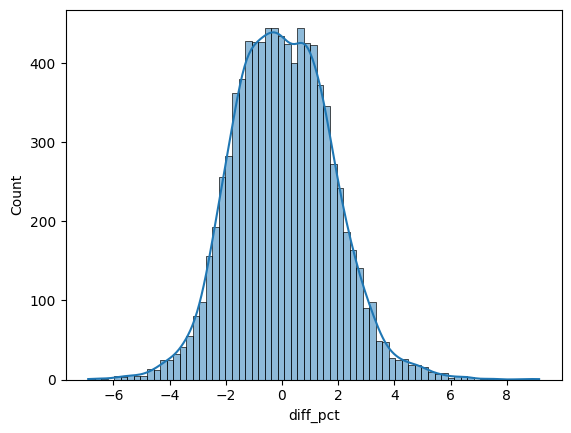

In [125]:
sns.histplot(results_df['diff_pct'],kde=True)

In [126]:
error_threshold=10
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>error_threshold]
extreme_resutls_df

,actual,predicted,diff,diff_pct


In [127]:
extreme_error_pct=extreme_resutls_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.0

In [128]:
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)
extreme_resutls_df

,actual,predicted,diff,diff_pct


In [129]:
extreme_error_df=X_test.loc[extreme_resutls_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


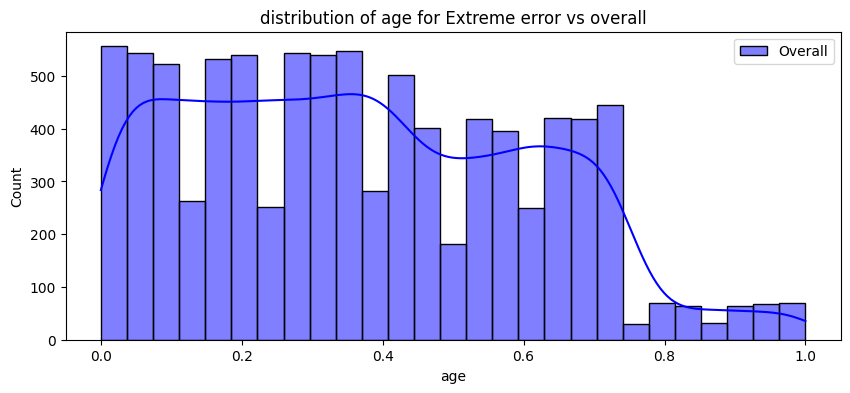

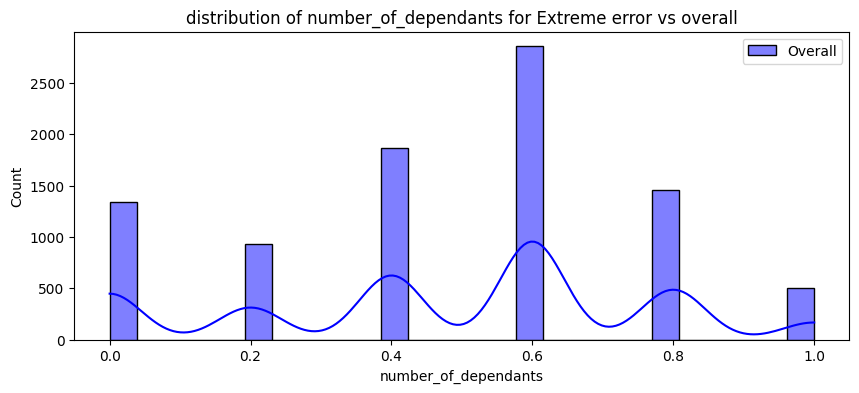

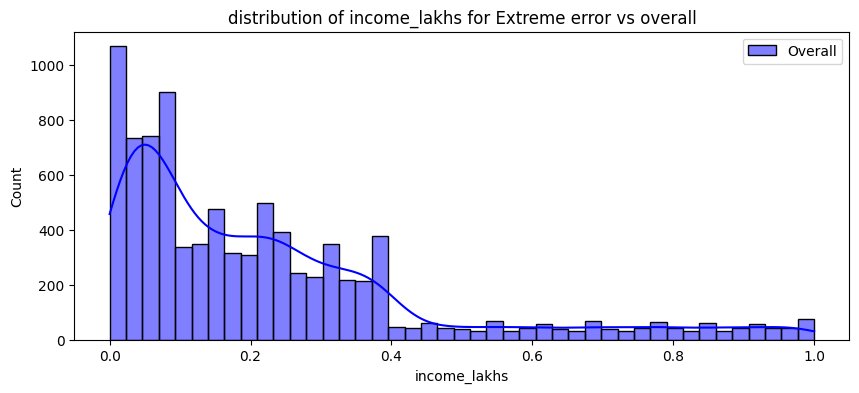

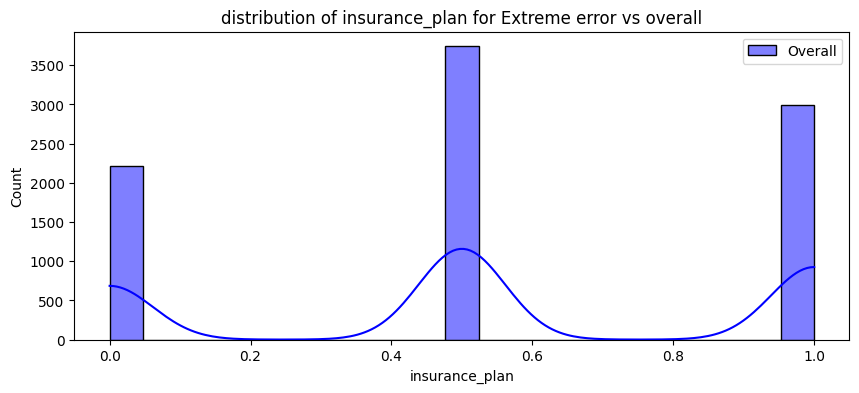

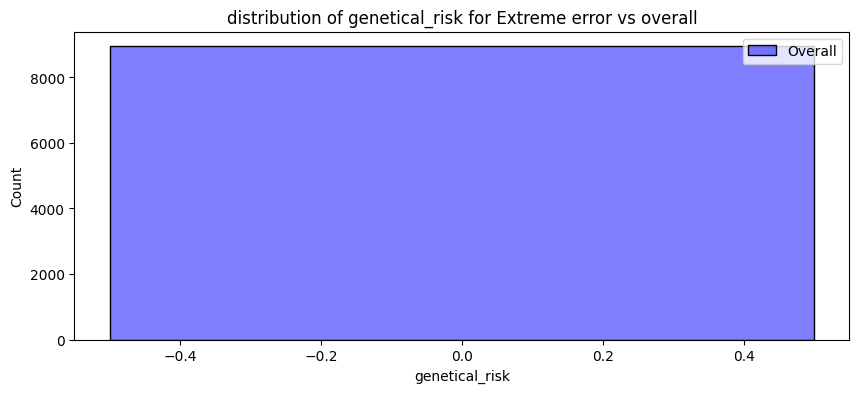

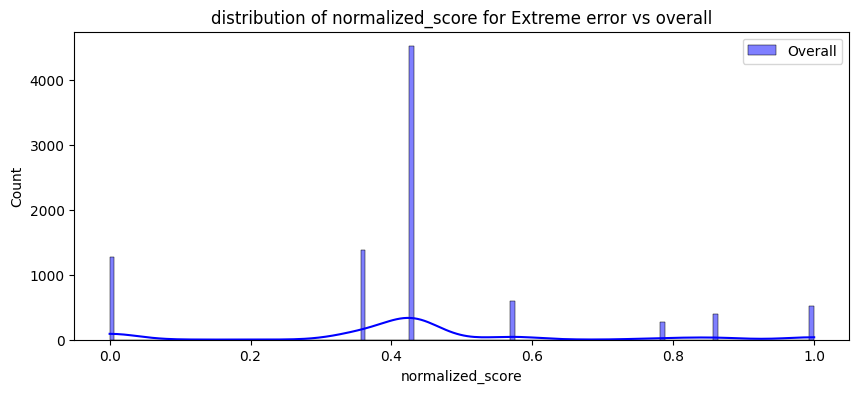

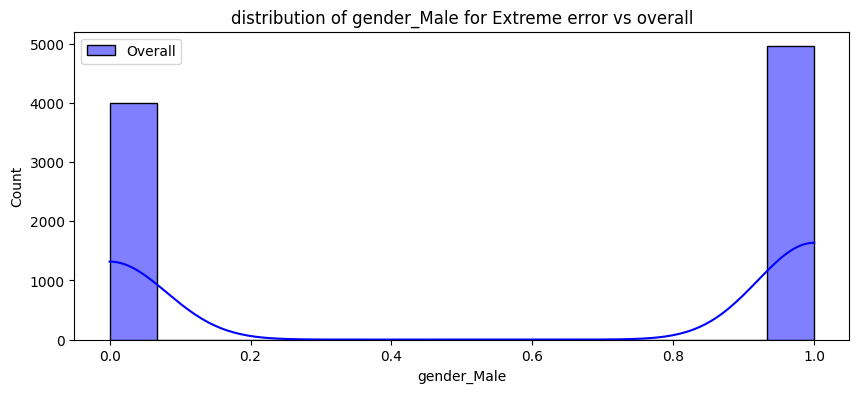

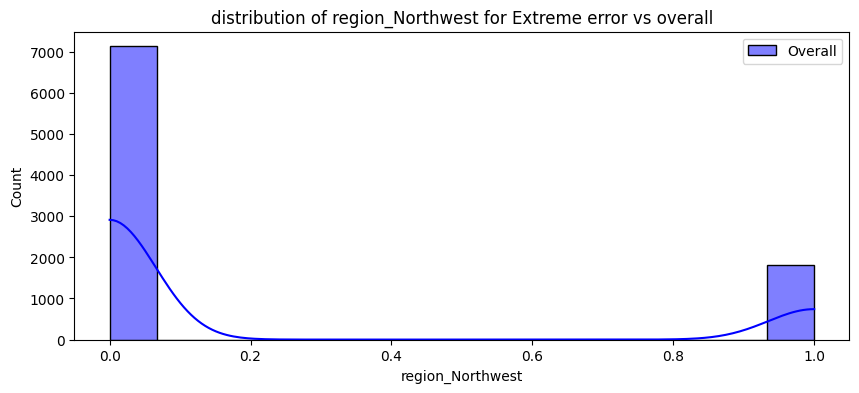

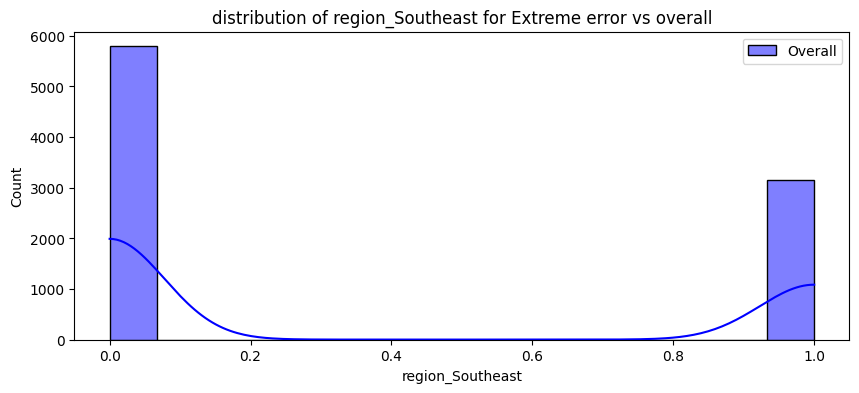

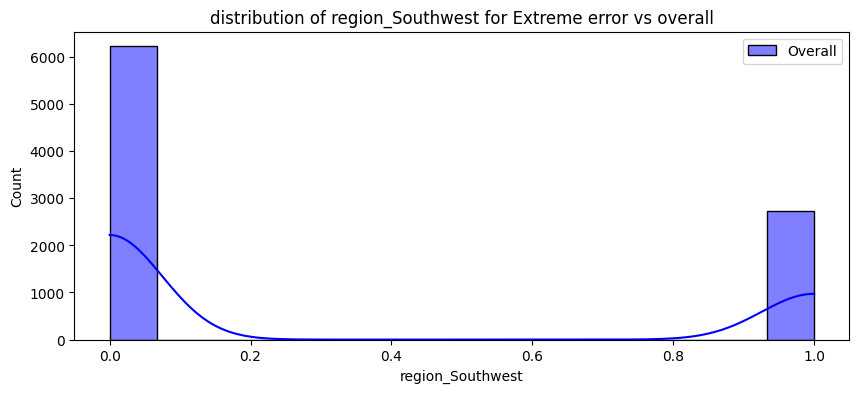

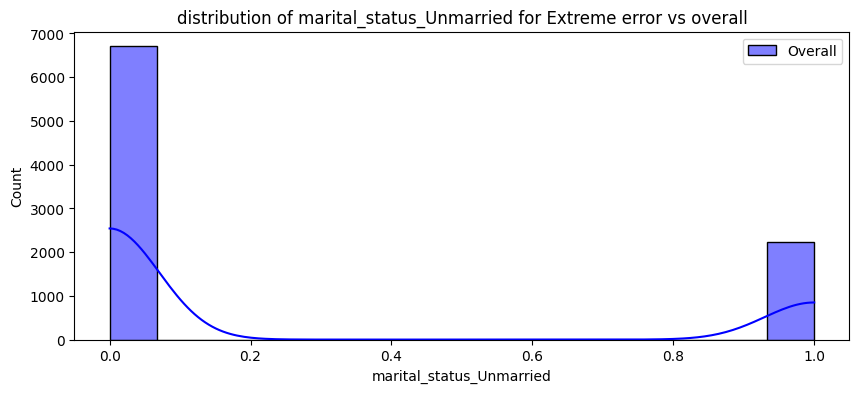

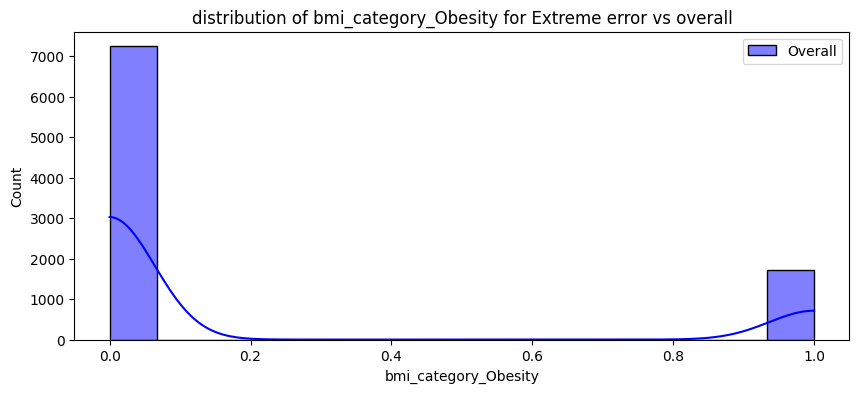

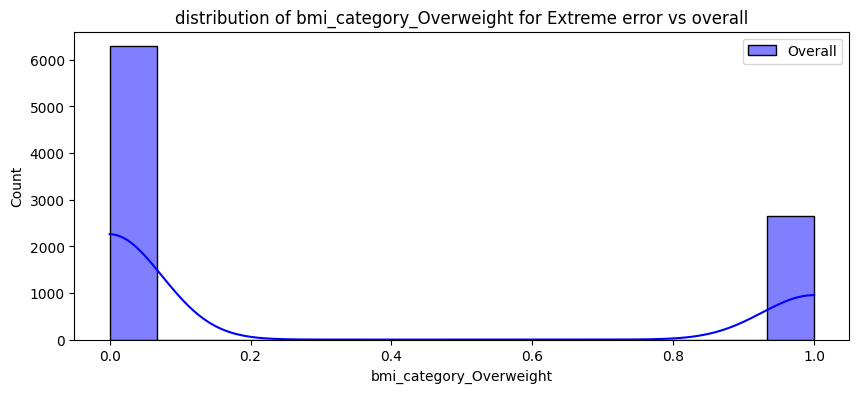

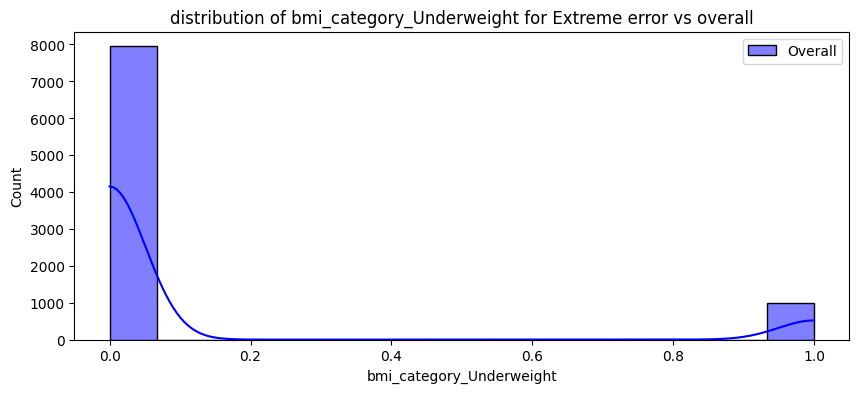

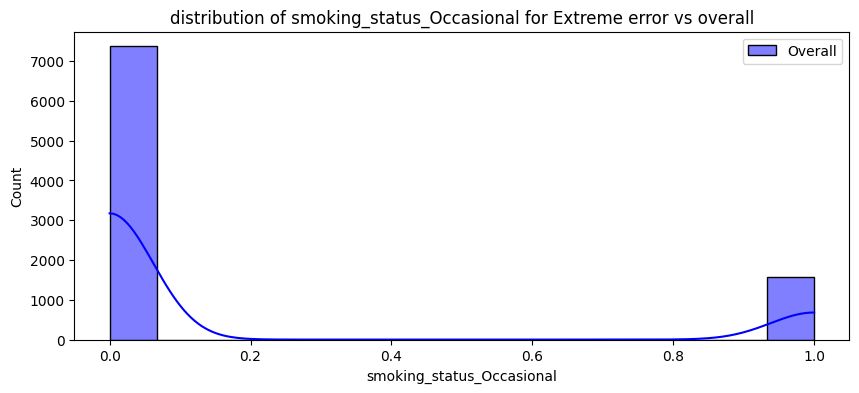

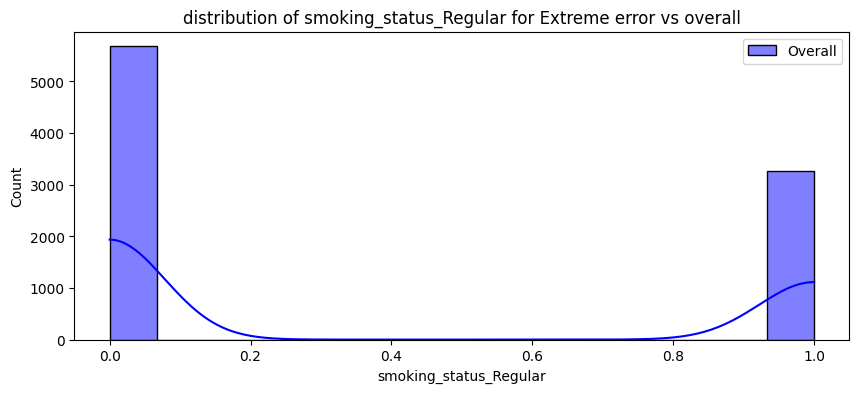

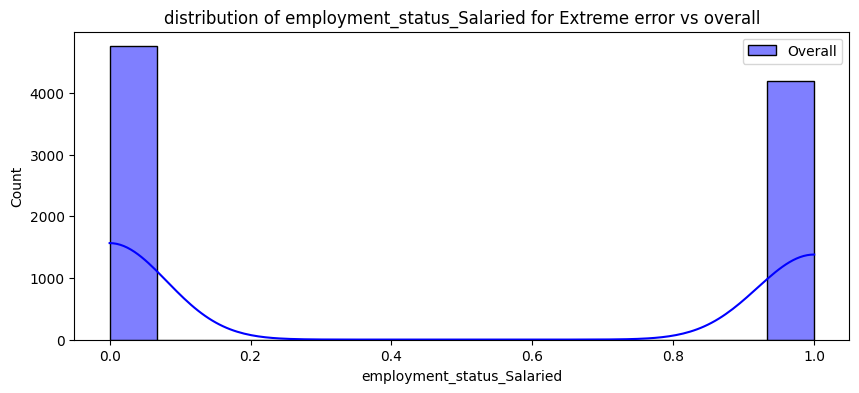

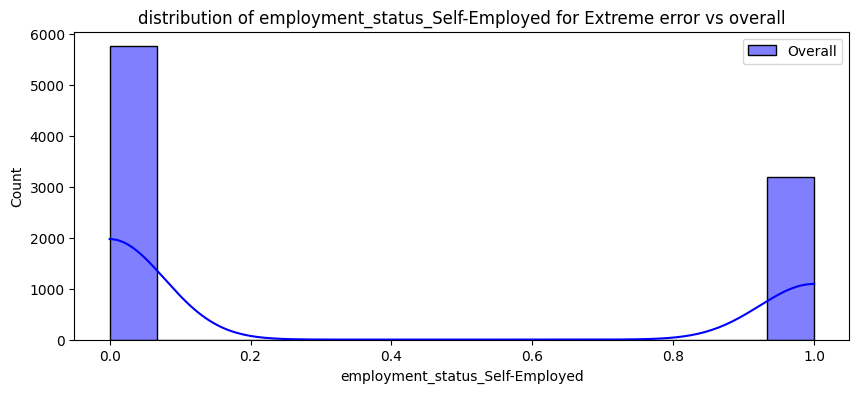

In [130]:
for feature in X_test.columns:
        plt.figure(figsize=(10,4))
        
        sns.histplot(X_test[feature],label="Overall",color='blue',alpha=0.5,kde=True)
        sns.histplot(extreme_error_df[feature],label="Extreme Errors",color='red',kde=True)
        plt.title(f'distribution of {feature} for Extreme error vs overall')
        plt.legend()
        plt.show()

In [131]:
extreme_error_df.columns,cols_to_scale
extreme_error_df.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


In [132]:
extreme_error_df['income_level']=-1
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [ ]:
sns.histplot(df_reversed.age,kde=True)

In [ ]:
df_reversed.describe()